# Stimuli from Images

This notebook shows how to generate random stimuli from a cartoon image.

In [1]:
%matplotlib inline

import os
from pathlib import Path

import numpy as np
import scipy

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import *

import pygestalt as gs
from pygestalt import sampler

In [2]:
outdir = Path(os.getcwd()) / 'outputs'
os.makedirs(outdir, exist_ok=True)

## Extract contour informations from image

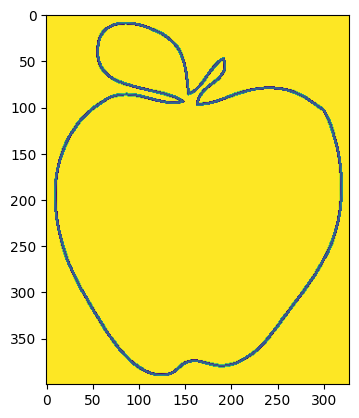

In [3]:
fname = Path('/home/han/Projects/DeepBrain/Codes/pygestalt/notebooks/images/apple.png')
image = plt.imread(fname)

X0 = np.mean(image, axis=-1)
plt.imshow(X0, aspect='equal')

In [52]:
Xs, Hs = gs.utils.contour_from_image(X0)

Xs = Xs/X0.shape  # convert to the coordinate in the box [0,1]x[0,1]

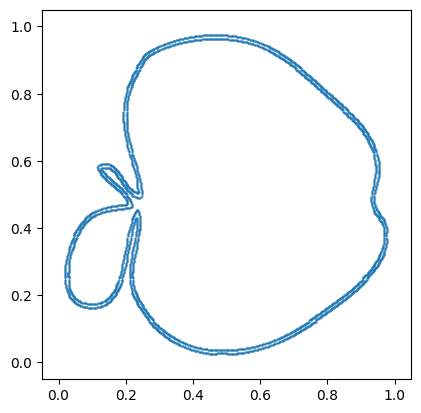

In [53]:
plt.scatter(Xs[:,0], Xs[:,1], marker='.', s=1)
ax = plt.gca()
ax.set_xlim((-0.05,1.05))
ax.set_ylim((-0.05,1.05))
ax.set_aspect('equal')   

## Generation of random stimulus

In [6]:
radius = 0.025
thresh = 1e-3

%time C, _ = sampler.draw_positions(radius, sampler.point_set(Xs), thresh=thresh)
%time D, _ = sampler.draw_positions(radius, sampler.box(), exclusions=C, thresh=thresh)

CPU times: user 2.41 s, sys: 0 ns, total: 2.41 s
Wall time: 2.41 s
CPU times: user 19.8 s, sys: 0 ns, total: 19.8 s
Wall time: 19.9 s


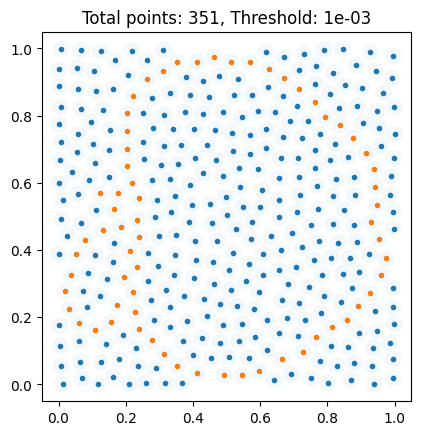

In [7]:
fig, ax = gs.utils.ball_plot(D, C, radius=radius, thresh=thresh)

### Placement of patches

In [71]:
N = 512
xs, ys = np.meshgrid(range(N), range(N))
xys = np.stack([xs,ys]).reshape((2,-1)).T/N

#### Comparison of two patches

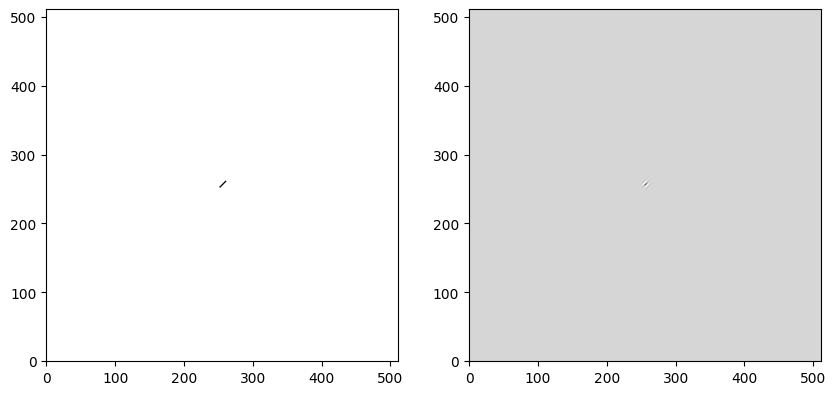

In [94]:
f = 100
σ2 = 0.0025
pgabor = lambda z,h: gs.patch.gabor(z, h, f, σ2)

l=0.025
w=0.005
pseg = lambda z,h: gs.patch.segment(z, h, l, w)

Igabor = pgabor(xys-[0.5,0.5], h=[1,1]).reshape(N,N)
Iseg = pseg(xys-[0.5,0.5], h=[1,1]).reshape(N,N)

fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(Iseg, origin='lower', cmap='Greys')
axes[1].imshow(Igabor, origin='lower', cmap='Greys')

### Generation of stimulus

In [65]:
pfunc = pgabor

N = 1024
If = gs.patch.generate_image_foreground(C, Xs, Hs, N=N, pfunc=pfunc)
Ig = gs.patch.generate_image(D, N=N, pfunc=pfunc)

I = If + Ig

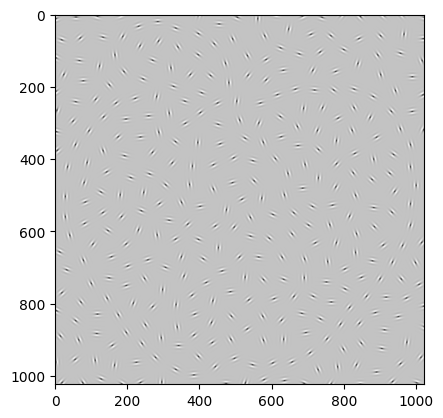

In [66]:
Im = np.fliplr(np.rot90(Im,-1))

plt.imshow(Im, aspect='equal', cmap='binary')
# plt.set_cmap('Greys')
# plt.imsave(outdir/f'bunny{N}.png', Im)

In [61]:
pfunc = pseg

N = 1024
If = gs.patch.generate_image_foreground(C, Xs, Hs, N=N, pfunc=pfunc)
Ig = gs.patch.generate_image(D, N=N, pfunc=pfunc)

I = If + Ig

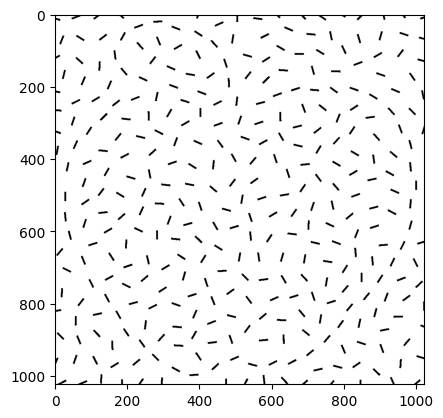

In [64]:
Im = np.fliplr(np.rot90(I,-1))

plt.imshow(Im, aspect='equal', cmap='binary')

# EOF